# Проверка данных на нормальность

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np
import pandas as pd
import math
import statsmodels.stats.power as smp
from tqdm.auto import tqdm
import seaborn as sns
import plotly.express as px

plt.style.use('ggplot')


from scipy.stats import norm, t, kstest, shapiro
import statsmodels.api as sm
from matplotlib import pyplot as plt
from scipy import stats


import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')



In [ ]:
np.random.seed(17)

In [ ]:
# помимо нормального распределения создадим выборку  распределения Стьюдента с пятью степенями свободы. По форме они очень похожи

x = norm.rvs(size = 250) # 250 наблюдений
y = t.rvs(size = 250, df = 5) # 250 наблюдений + 5 степеней свободы

In [ ]:
import plotly.express as px
fig = px.histogram(y, x=y, title='y', marginal = 'box')
fig.show(renderer='colab')

In [ ]:
import plotly.express as px
fig = px.histogram(x, x=x, title='x', marginal = 'box')
fig.show(renderer='colab')

# Проверка на нормальность
1. Графические методы: оценка данных с использованием гистограммы и Quantile-Quantile-plot
2. Статистические методы: критерии для проверки нормальности распределения (критерий Шапиро-Уилка при n < 5000 и критерий Колмагорова-Смирнова для выборок любого размера)


Можно визуально проверить работу тестов с помощью функции qqplot.Она построит график квантилей распределения по оси теоретического нормального распределения. ПОлучиться должна прямая, идущая из угла в верхний правый.

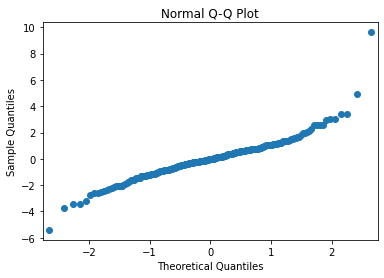

In [ ]:
fig = sm.qqplot(y, color="green")
plt.title('Normal Q-Q Plot')
plt.show()

# Проверка на нормальность. Тест Колмагорова-Смирнова
Тест Колмагорова-Смирнова применяется для выборок любого размера

H0: х взята из генеральной совокупности с нормальным распределением

H1: х взята из генеральной совокупности с дргуим распределением

Тест Колмагорова-Смирнова также можно использовать для проверки любого другого распределения.

Принятие решения: **при p > alpha можно заключить, что анализируемое распределение не отличается от нормального**.

Его можно использовать для проверки любого распределения, в т.ч. и Стьюдента, Биномиального, Коши, Экспоненциального.

In [ ]:
# Проверяем принадлежность выборок к нормальному распределению
print(kstest(x, 'norm'))
print(kstest(y, 'norm'))

KstestResult(statistic=0.057424163162479946, pvalue=0.3678988921991774, statistic_location=-0.006456710309898987, statistic_sign=-1)
KstestResult(statistic=0.054751982840907654, pvalue=0.4266179885446888, statistic_location=-1.0927671816577422, statistic_sign=1)


In [ ]:
# Семейство Экспоненциальных (сложная гипотеза)
print(kstest(x, 'expon'))

# Биномиальное, оно требует уточнения параметров (простая гипотеза)
print(kstest(x, 'binom', args=(1500, 0.16)))

KstestResult(statistic=0.448, pvalue=2.739849972719059e-46, statistic_location=-0.0036960408325081625, statistic_sign=1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3.3451573949029427, statistic_sign=1)


# Проверка на нормальность. Тест Шапиро-Уилка
Тест Шапиро-Уилка применяется для выборки, состоящей из менее, чем 5000 наблюдений.

H0: x взята из генеральной совокупности с нормальным распределением

H1: x взята из генеральной совокупности с другим распределением

Тест Шапиро-Уилка является одним из наиболее мощных критериев для проверки нормальности.

Принятие решения: **p > alpha можно заключить, что анализируемое распределение не отличается от номрального**.

In [ ]:
W, p_val = shapiro(x)
print('Shapiro-Wilk normality test for X')
print('W =', W)
print('P-value =', p_val)

Shapiro-Wilk normality test for X
W = 0.9963920712471008
P-value = 0.8381169438362122


In [ ]:
W, p_val = shapiro(y)
print('Shapiro-Wilk normality test for Y')
print('W =', W)
print('P-value =', p_val)

Shapiro-Wilk normality test for Y
W = 0.9189559817314148
P-value = 2.0091221741846965e-10


Можно обратить внимание, что тест шапиро-Уилка отвергает нулевую гипотезу выборки Y при том, что тест Колмагорова-Смирнова говорит обратное с p-value = 0,43. Видим, наглядное подтверждение мощности теста Шапиро-Уилка на небольших выборках.

# Анализ мощности теста. Расчет длительности эксперимента.

# Факторы, влияющие на длительность теста:

1. Статистические: размер выбора (effect size, ошибки 1 и 2 рода); дисперсия
2. Продуктовые: сезонность (недельная, месячная); метрика (тип метрики и окно закрытия метрики)

In [ ]:
# Критерий пропорции (нужен для кликов, конверсий)

alpha = 0.05 # ошибка 1 рода
power = 0.9 # мощность
n = 450 # кол-во наблюдений
p_x = 0.5 # конверсия в одной группе
p_y = 0.6 # конверсия в ругой группе

h = 2*math.asin(np.sqrt(p_x)) - 2*math.asin(np.sqrt(p_y)) # ищем effect size для Z-критерия пропорции. h = φ1 - φ2, где φ1 = 2arcsine(√Pi)
h

-0.20135792079033066

In [ ]:
# Какой будет мощность критерия для выборкииз n наболюдений, при том что величина эффекта = h с и alpha = 5%

power = smp.zt_ind_solve_power(effect_size=h, nobs1=n, alpha=alpha, alternative='two-sided')
power

0.8555200838742346

In [ ]:
# Какое количесвто наблюдений необходимо для заданного эффекта при c alpha = 5% и power = 80%

smp.zt_ind_solve_power(effect_size=h, alpha=alpha, power=power, alternative='two-sided')

449.9999999951084

In [ ]:
# Какой будет величина эффекта будет при рассчете теста, при указанных alpha и power

smp.zt_ind_solve_power(nobs1=n, alpha=alpha, power=power)

0.20135582707747696

In [ ]:
effects = []
sample_sizes = []

for i in tqdm(range(10,10000)):
  effects.append(smp.tt_ind_solve_power(nobs1=i, alpha=alpha, power=power))
  sample_sizes.append(i)

  0%|          | 0/9990 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame({'effects':effects, 'sample_sizes':sample_sizes})
df

,effects,sample_sizes
0,1.428738,10
1,1.354278,11
2,1.290467,12
3,1.234970,13
4,1.186115,14
...,...,...
9985,0.042727,9995
9986,0.042725,9996
9987,0.042723,9997
9988,0.042721,9998


In [ ]:
fig = px.line(df, x='sample_sizes', y='effects', title='effect vs sample size')
fig.show(renderer="colab")

In [ ]:
power = []
sample_sizes = []

for i in tqdm(range(10,10000)):
  power.append(smp.tt_ind_solve_power(nobs1=i, alpha=alpha, effect_size = 0.1))
  sample_sizes.append(i)

  0%|          | 0/9990 [00:00<?, ?it/s]

In [ ]:
df_2 = pd.DataFrame({'power':power, 'sample_sizes':sample_sizes})
df_2

,power,sample_sizes
0,0.055161,10
1,0.055741,11
2,0.056320,12
3,0.056899,13
4,0.057479,14
...,...,...
9985,1.000000,9995
9986,1.000000,9996
9987,1.000000,9997
9988,1.000000,9998


In [ ]:
fig = px.line(df_2, x='sample_sizes', y='power', title='power vs sample size')
fig.show(renderer="colab")

# Множественная проверка гипотез

In [ ]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=1000, random_state=0)
rvs2 = stats.norm.rvs(loc=6.5, scale=8, size=1000, random_state=0)

In [ ]:
def t_test_function(rvs, alpha, no_test):
  counter = 0
  for i in range(no_test):
    rvs_random = stats.norm.rvs(loc=5, scale=10, size=1000, random_state=i+1)

    statistic, pvalue = stats.ttest_ind(rvs, rvs_random, equal_var=False)

    if pvalue <= alpha:
      counter = counter + 1
  print(counter)   

In [ ]:
def bonferroni_correction_function(rvs, alpha, no_test):
  alpha_bonferroni = alpha / no_test

  counter = 0
  for i in range(no_test):
    rvs_random = stats.norm.rvs(loc=5, scale=10, size=1000, random_state=i+1)

    statistic, pvalue = stats.ttest_ind(rvs, rvs_random, equal_var=False)

    if pvalue <= alpha_bonferroni:
      counter = counter + 1
  print(counter)  

In [ ]:
t_test_function(rvs1, alpha=0.05, no_test=100)
t_test_function(rvs2, alpha=0.05, no_test=100)

bonferroni_correction_function(rvs1, alpha=0.05, no_test=100)
bonferroni_correction_function(rvs2, alpha=0.05, no_test=100)

11
85
0
18


# Бутстрап

In [ ]:
!pip install bootstrapped

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13952 sha256=ebd1c1b3bb73ea02228b4c4637405d62ce75fe89809f16d8f6ebdaf96cf693f6
  Stored in directory: /root/.cache/pip/wheels/a9/7b/e9/000ad8cb18a35a7d68051b362c96a867cd24b7b0c7b478329d
Successfully built bootstrapped


In [ ]:
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

In [ ]:
n = 11000
sample_A = np.random.exponential(scale=1/0.002, size=n)
sample_B = np.random.exponential(scale=1/0.00201, size=n)

df = pd.DataFrame({"sample_A":sample_A, "sample_B":sample_B})
df

,sample_A,sample_B
0,618.965665,226.614297
1,763.776527,1848.637144
2,583.843741,65.365143
3,1715.734490,63.395782
4,186.188827,204.206904
...,...,...
10995,565.976190,1001.653028
10996,41.189618,1821.293829
10997,705.232442,681.285748
10998,184.694311,314.120153


In [ ]:
s1 = df.sample_A.values
s2 = df.sample_B.values

b = bs.bootstrap_ab(s1,s2, stat_func=bs_stats.mean,
compare_func=bs_compare.difference,alpha=0.05,num_iterations=10000)

print(b.lower_bound, b.upper_bound)

-10.993736088573673 15.32370946407741


In [ ]:
v = bs.bootstrap_ab(s1,s2, stat_func=bs_stats.std,compare_func=bs_compare.difference,alpha=0.05,num_iterations=10000)
print(v.lower_bound, v.upper_bound)

-22.858855498141594 17.43952462366417


# Бакетирование - 

трансформация распределения случайной величины в нормальное с помощью техники бакетирования.

Бакетирование подходит тогда, когда необходимо:
- сохранить информацию о дисперсии и среднем в выборке до трансформации
- привести к нормальному распределению


In [ ]:
# Сгенерируем данные. В качестве примера используем экспоненциальное распределение. Возьмем кратное количество групп, например, 2000 (можно 300, 600)

b = 2000
n = 200000

val_A = np.random.exponential(scale=1/0.02, size=n)
val_B = np.random.exponential(scale=1/0.021, size=n)

sample_exp = pd.DataFrame({
    "metric": np.concatenate([val_A, val_B]),
    "group":["A" for i in range(n)] + ["B" for i in range(n)],
    "bucket": [i for i in range(b)] * int(n*2/b)
    })

In [ ]:
# Агрегация по бакетам и расчет среднего:

backeted_df = sample_exp.groupby(by=["bucket","group"])["metric"].agg(
    mu=np.mean,
    sd_mu=np.std
).reset_index()

In [ ]:
backeted_df.head()

,bucket,group,mu,sd_mu
0,0,A,48.195445,47.228852
1,0,B,47.217249,39.455068
2,1,A,53.460202,49.804852
3,1,B,42.690466,41.866222
4,2,A,44.851785,43.051009


In [ ]:
# Сравниваем выборочное среднее и среднее по бакетам

round(np.mean(sample_exp["metric"]),3) == round(np.mean(backeted_df["mu"]),3)

True

In [ ]:
np.var(sample_exp["metric"]) / len(sample_exp["metric"])

0.005958988903305421

In [ ]:
np.var(backeted_df["mu"]) / len(backeted_df["mu"])

0.006017143521847839

In [ ]:
sample_exp

,metric,group,bucket
0,25.097828,A,0
1,38.931374,A,1
2,18.845848,A,2
3,22.336619,A,3
4,36.637971,A,4
...,...,...,...
399995,86.110919,B,1995
399996,29.661600,B,1996
399997,35.568408,B,1997
399998,108.388990,B,1998


In [ ]:
fig = px.histogram(sample_exp, x=sample_exp.metric, title='x',marginal = 'box')
fig.show(renderer="colab")

In [ ]:
# С применением бакетирования получаем распределение, похожее на нормальное

fig = px.histogram(backeted_df, x=backeted_df.mu, title='x',marginal = 'box')
fig.show(renderer="colab")

In [ ]:
# + можно применить критерии Шапиро-Уилка / Колмогорова-Смирнова /QQplot для проверки нормальности распределения

In [ ]:
# Сравниваем бутстрап на изначальных данных и на данных с применением бакетирования.
# Строим доверит интервал для разницы. Видим, что при применении бутстрапа и бакетирования доверит. интервалы почти одинаковые, но бакетирование ускоряет обработку данных, когда речь идет о выборках в миллионы пользователей. 

s1 = sample_exp[sample_exp.group == 'A'].metric.values
s2 = sample_exp[sample_exp.group == 'B'].metric.values

b = bs.bootstrap_ab(s1,s2, stat_func=bs_stats.mean,compare_func=bs_compare.difference,alpha=0.05,num_iterations=500)
print(b.lower_bound, b.upper_bound)

1.8021495434256853 2.4426813923131863


In [ ]:
s1 = backeted_df[backeted_df.group == 'A'].mu.values
s2 = backeted_df[backeted_df.group == 'B'].mu.values

b = bs.bootstrap_ab(s1,s2, stat_func=bs_stats.mean,compare_func=bs_compare.difference,alpha=0.05,num_iterations=500)
print(b.lower_bound, b.upper_bound)

1.8361045282176023 2.441853365033702
